# Road Accidents Analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 

In [2]:
raw_data = pd.ExcelFile('Road Transport FRSC Q1-Q4 22.xlsx')

Q1 = raw_data.parse('Q1 2023', header=2)
Q1_causes = raw_data.parse('Q1 causes', header=1)
Q2 = raw_data.parse('Q2 2023', header=2)
Q2_causes = raw_data.parse('Q2 causes', header=1)
Q3 = raw_data.parse('Q3 2023', header=2)
Q3_causes = raw_data.parse('Q3 causes', header=1)
Q4 = raw_data.parse('Q4 2023', header=2)
Q4_causes = raw_data.parse('Q4 causes ')

In [3]:
Q1

,STATE,FATAL,SERIOUS,MINOR,TOTAL CASES,NUMBER INJURED,NUMBER KILLED,TOTAL CASUALTY,PEOPLE INVOLVED
0,Abia,7,5,0,12,45,16,61,81
1,Adamawa,13,40,0,53,152,20,172,272
2,Akwa Ibom,3,6,0,9,16,3,19,32
3,Anambra,4,8,3,15,76,3,79,161
4,Bauchi,43,56,11,110,473,139,612,826
5,Bayelsa,2,2,2,6,11,1,12,28
6,Benue,3,27,7,37,84,4,88,226
7,Borno,6,17,3,26,76,9,85,115
8,Cross River,5,7,0,12,35,7,42,76
9,Delta,12,7,3,22,87,34,121,174


### Data Integration

In [4]:
# drop the total row for all quarter and drop the total columns for the causes 
Quarters  = [Q1, Q2, Q3, Q4, Q1_causes, Q2_causes, Q3_causes, Q4_causes]

for q in Quarters:
    q.drop(37, axis=0, inplace=True)
    if 'TOTAL' in list(q.columns):
        q.drop('TOTAL', axis=1, inplace=True)        

In [5]:
# join tables 
q1  = pd.merge(Q1_causes, Q1, on='STATE')
q2  = pd.merge(Q2_causes, Q2, on='STATE')
q3  = pd.merge(Q3_causes, Q3, on='STATE')
q4  = pd.merge(Q4_causes, Q4, on='STATE')

q1

,STATE,SPV,UPD,TBT,MDV,BFL,OVL,DOT,WOT,DGD,...,SLV,OTHERS,FATAL,SERIOUS,MINOR,TOTAL CASES,NUMBER INJURED,NUMBER KILLED,TOTAL CASUALTY,PEOPLE INVOLVED
0,Abia,7,0,3,0,0,1,0,0,2,...,1,0,7,5,0,12,45,16,61,81
1,Adamawa,35,0,0,1,0,1,0,4,5,...,7,2,13,40,0,53,152,20,172,272
2,Akwa Ibom,4,0,1,0,0,0,0,1,2,...,1,1,3,6,0,9,16,3,19,32
3,Anambra,8,0,0,3,1,0,0,2,0,...,1,2,4,8,3,15,76,3,79,161
4,Bauchi,79,0,12,3,2,2,1,24,5,...,7,10,43,56,11,110,473,139,612,826
5,Bayelsa,8,0,1,0,0,1,0,0,0,...,0,0,2,2,2,6,11,1,12,28
6,Benue,19,0,1,2,1,0,0,3,1,...,0,5,3,27,7,37,84,4,88,226
7,Borno,6,0,7,1,0,0,0,0,2,...,9,1,6,17,3,26,76,9,85,115
8,Cross River,12,0,0,0,2,0,0,0,0,...,0,0,5,7,0,12,35,7,42,76
9,Delta,15,0,7,0,0,1,0,2,0,...,7,0,12,7,3,22,87,34,121,174


In [6]:
q1.columns 

Index(['STATE', 'SPV', 'UPD', 'TBT', 'MDV', 'BFL', 'OVL', 'DOT', 'WOT', 'DGD',
       'BRD', 'RTV', 'OBS', 'SOS', 'DAD', 'PWR', 'FTQ', 'SLV', 'OTHERS',
       'FATAL', 'SERIOUS', 'MINOR', 'TOTAL CASES', 'NUMBER INJURED',
       'NUMBER KILLED', 'TOTAL CASUALTY', 'PEOPLE INVOLVED'],
      dtype='object')

In [7]:
# add a columns names quarters 
q1['Quarters'] = 'Q1'
q2['Quarters'] = 'Q2'
q3['Quarters'] = 'Q3'
q4['Quarters'] = 'Q4'

In [8]:
# rearrange the order of the column 
q1 = q1[['STATE','Quarters', 'SPV', 'UPD', 'TBT', 'MDV', 'BFL', 'OVL', 'DOT', 'WOT', 'DGD',
       'BRD', 'RTV', 'OBS', 'SOS', 'DAD', 'PWR', 'FTQ', 'SLV', 'OTHERS',
       'FATAL', 'SERIOUS', 'MINOR', 'TOTAL CASES', 'NUMBER INJURED',
       'NUMBER KILLED', 'TOTAL CASUALTY', 'PEOPLE INVOLVED']]
q2 = q2[['STATE','Quarters', 'SPV', 'UPD', 'TBT', 'MDV', 'BFL', 'OVL', 'DOT', 'WOT', 'DGD',
       'BRD', 'RTV', 'OBS', 'SOS', 'DAD', 'PWR', 'FTQ', 'SLV', 'OTHERS',
       'FATAL', 'SERIOUS', 'MINOR', 'TOTAL CASES', 'NUMBER INJURED',
       'NUMBER KILLED', 'TOTAL CASUALTY', 'PEOPLE INVOLVED']]
q3 = q3[['STATE','Quarters', 'SPV', 'UPD', 'TBT', 'MDV', 'BFL', 'OVL', 'DOT', 'WOT', 'DGD',
       'BRD', 'RTV', 'OBS', 'SOS', 'DAD', 'PWR', 'FTQ', 'SLV', 'OTHERS',
       'FATAL', 'SERIOUS', 'MINOR', 'TOTAL CASES', 'NUMBER INJURED',
       'NUMBER KILLED', 'TOTAL CASUALTY', 'PEOPLE INVOLVED']]
q4 = q4[['STATE','Quarters', 'SPV', 'UPD', 'TBT', 'MDV', 'BFL', 'OVL', 'DOT', 'WOT', 'DGD',
       'BRD', 'RTV', 'OBS', 'SOS', 'DAD', 'PWR', 'FTQ', 'SLV', 'OTHERS',
       'FATAL', 'SERIOUS', 'MINOR', 'TOTAL CASES', 'NUMBER INJURED',
       'NUMBER KILLED', 'TOTAL CASUALTY', 'PEOPLE INVOLVED']]

q1

,STATE,Quarters,SPV,UPD,TBT,MDV,BFL,OVL,DOT,WOT,...,SLV,OTHERS,FATAL,SERIOUS,MINOR,TOTAL CASES,NUMBER INJURED,NUMBER KILLED,TOTAL CASUALTY,PEOPLE INVOLVED
0,Abia,Q1,7,0,3,0,0,1,0,0,...,1,0,7,5,0,12,45,16,61,81
1,Adamawa,Q1,35,0,0,1,0,1,0,4,...,7,2,13,40,0,53,152,20,172,272
2,Akwa Ibom,Q1,4,0,1,0,0,0,0,1,...,1,1,3,6,0,9,16,3,19,32
3,Anambra,Q1,8,0,0,3,1,0,0,2,...,1,2,4,8,3,15,76,3,79,161
4,Bauchi,Q1,79,0,12,3,2,2,1,24,...,7,10,43,56,11,110,473,139,612,826
5,Bayelsa,Q1,8,0,1,0,0,1,0,0,...,0,0,2,2,2,6,11,1,12,28
6,Benue,Q1,19,0,1,2,1,0,0,3,...,0,5,3,27,7,37,84,4,88,226
7,Borno,Q1,6,0,7,1,0,0,0,0,...,9,1,6,17,3,26,76,9,85,115
8,Cross River,Q1,12,0,0,0,2,0,0,0,...,0,0,5,7,0,12,35,7,42,76
9,Delta,Q1,15,0,7,0,0,1,0,2,...,7,0,12,7,3,22,87,34,121,174


In [9]:
# append all quaters as one dataframe
df = pd.concat([q1, q2, q3, q4], ignore_index = True)

df.head()

,STATE,Quarters,SPV,UPD,TBT,MDV,BFL,OVL,DOT,WOT,...,SLV,OTHERS,FATAL,SERIOUS,MINOR,TOTAL CASES,NUMBER INJURED,NUMBER KILLED,TOTAL CASUALTY,PEOPLE INVOLVED
0,Abia,Q1,7,0,3,0,0,1,0,0,...,1,0,7,5,0,12,45,16,61,81
1,Adamawa,Q1,35,0,0,1,0,1,0,4,...,7,2,13,40,0,53,152,20,172,272
2,Akwa Ibom,Q1,4,0,1,0,0,0,0,1,...,1,1,3,6,0,9,16,3,19,32
3,Anambra,Q1,8,0,0,3,1,0,0,2,...,1,2,4,8,3,15,76,3,79,161
4,Bauchi,Q1,79,0,12,3,2,2,1,24,...,7,10,43,56,11,110,473,139,612,826


In [10]:
# save to csv
#df.to_csv('Road Transport FRSC 2023.csv')

In [11]:
df.columns

Index(['STATE', 'Quarters', 'SPV', 'UPD', 'TBT', 'MDV', 'BFL', 'OVL', 'DOT',
       'WOT', 'DGD', 'BRD', 'RTV', 'OBS', 'SOS', 'DAD', 'PWR', 'FTQ', 'SLV',
       'OTHERS', 'FATAL', 'SERIOUS', 'MINOR', 'TOTAL CASES', 'NUMBER INJURED',
       'NUMBER KILLED', 'TOTAL CASUALTY', 'PEOPLE INVOLVED'],
      dtype='object')

In [12]:
# Rename columns headers 
new_names = {'SPV':'Speed Violation', 'UPD':'Use of Phone While Driving', 'TBT':'Tyre Burst',
             'MDV':'Mechanically Deficient Vehicle', 'BFL': 'Brake Failure', 
             'OVL':'Overloading', 'DOT':'Dangerous Overtaking',
             'WOT':'Wrongful Overtaking', 'DGD':'Dangerous Driving',
             'BRD': 'Bad Road', 'RTV':'Route Violation', 
             'OBS': 'Road Obstruction Violation', 
             'SOS': 'Sleeping on Steering', 
             'DAD': 'Alcohol/Drug Influence', 
             'PWR': 'Poor Weather', 
             'FTQ':'Fatique', 'SLV':'Sign Light Violation'}
df.rename(columns=new_names, inplace=True)

In [13]:
pd.set_option("display.max_columns", None)
df

,STATE,Quarters,Speed Violation,Use of Phone While Driving,Tyre Burst,Mechanically Deficient Vehicle,Brake Failure,Overloading,Dangerous Overtaking,Wrongful Overtaking,Dangerous Driving,Bad Road,Route Violation,Road Obstruction Violation,Sleeping on Steering,Alcohol/Drug Influence,Poor Weather,Fatique,Sign Light Violation,OTHERS,FATAL,SERIOUS,MINOR,TOTAL CASES,NUMBER INJURED,NUMBER KILLED,TOTAL CASUALTY,PEOPLE INVOLVED
0,Abia,Q1,7,0,3,0,0,1,0,0,2,0,0,0,0,0,0,0,1,0,7,5,0,12,45,16,61,81
1,Adamawa,Q1,35,0,0,1,0,1,0,4,5,0,1,0,0,0,0,0,7,2,13,40,0,53,152,20,172,272
2,Akwa Ibom,Q1,4,0,1,0,0,0,0,1,2,0,1,0,0,0,0,0,1,1,3,6,0,9,16,3,19,32
3,Anambra,Q1,8,0,0,3,1,0,0,2,0,0,2,0,0,0,0,0,1,2,4,8,3,15,76,3,79,161
4,Bauchi,Q1,79,0,12,3,2,2,1,24,5,2,4,4,0,0,0,0,7,10,43,56,11,110,473,139,612,826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Rivers,Q4,10,0,0,0,3,0,0,1,1,0,2,0,0,0,0,0,0,0,3,9,4,16,28,3,31,113
144,Sokoto,Q4,12,0,1,0,2,1,0,6,2,0,2,0,0,0,0,0,0,0,6,19,0,25,110,13,123,175
145,Taraba,Q4,13,0,1,3,1,0,0,2,11,4,1,1,0,0,0,0,4,0,4,39,0,43,113,13,126,214
146,Yobe,Q4,26,0,9,0,0,2,0,6,10,0,3,0,0,0,0,0,0,16,18,30,2,50,340,31,371,494


### Analysis 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   STATE                           148 non-null    object
 1   Quarters                        148 non-null    object
 2   Speed Violation                 148 non-null    int64 
 3   Use of Phone While Driving      148 non-null    int64 
 4   Tyre Burst                      148 non-null    int64 
 5   Mechanically Deficient Vehicle  148 non-null    int64 
 6   Brake Failure                   148 non-null    int64 
 7   Overloading                     148 non-null    int64 
 8   Dangerous Overtaking            148 non-null    int64 
 9   Wrongful Overtaking             148 non-null    int64 
 10  Dangerous Driving               148 non-null    int64 
 11  Bad Road                        148 non-null    int64 
 12  Route Violation                 148 non-null    in

In [15]:
# unique counts
df['STATE'].value_counts()

Abia           4
Kano           4
Kebbi          4
Kogi           4
Kwara          4
Lagos          4
Nasarawa       4
Niger          4
Ogun           4
Ondo           4
Osun           4
Oyo            4
Plateau        4
Rivers         4
Sokoto         4
Taraba         4
Yobe           4
Katsina        4
Kaduna         4
Adamawa        4
Jigawa         4
Akwa Ibom      4
Anambra        4
Bauchi         4
Bayelsa        4
Benue          4
Borno          4
Cross River    4
Delta          4
Ebonyi         4
Edo            4
Ekiti          4
Enugu          4
FCT            4
Gombe          4
Imo            4
Zamfara        4
Name: STATE, dtype: int64

In [16]:
# view the descriptives 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Speed Violation,148.0,55.695946,67.271979,0.0,14.00,31.0,70.25,340.0
Use of Phone While Driving,148.0,0.175676,0.462413,0.0,0.00,0.0,0.00,2.0
Tyre Burst,148.0,5.283784,6.269503,0.0,1.00,4.0,7.00,37.0
Mechanically Deficient Vehicle,148.0,2.358108,3.580009,0.0,0.00,1.0,3.25,20.0
Brake Failure,148.0,3.722973,5.058597,0.0,0.00,2.0,5.25,24.0
Overloading,148.0,0.824324,1.343750,0.0,0.00,0.0,1.00,7.0
Dangerous Overtaking,148.0,0.358108,0.989813,0.0,0.00,0.0,0.00,7.0
Wrongful Overtaking,148.0,5.412162,5.244925,0.0,2.00,4.0,7.25,25.0
Dangerous Driving,148.0,4.695946,6.591748,0.0,0.00,2.0,6.00,37.0
Bad Road,148.0,0.358108,0.982916,0.0,0.00,0.0,0.00,6.0


### Which Quarter recorded the highest casualty?

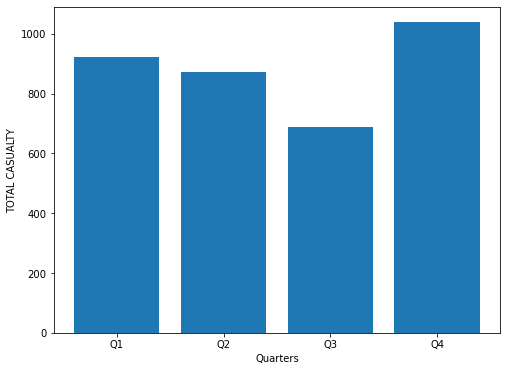

In [17]:
# check quarter with the highest casualty 

plt.figure(figsize=(8,6))

plt.bar(x=df['Quarters'], height=df['TOTAL CASUALTY'])
plt.xlabel('Quarters')
plt.ylabel('TOTAL CASUALTY')

plt.show()

### Which causes of accident are strongly correlated with the severity of the incident ?

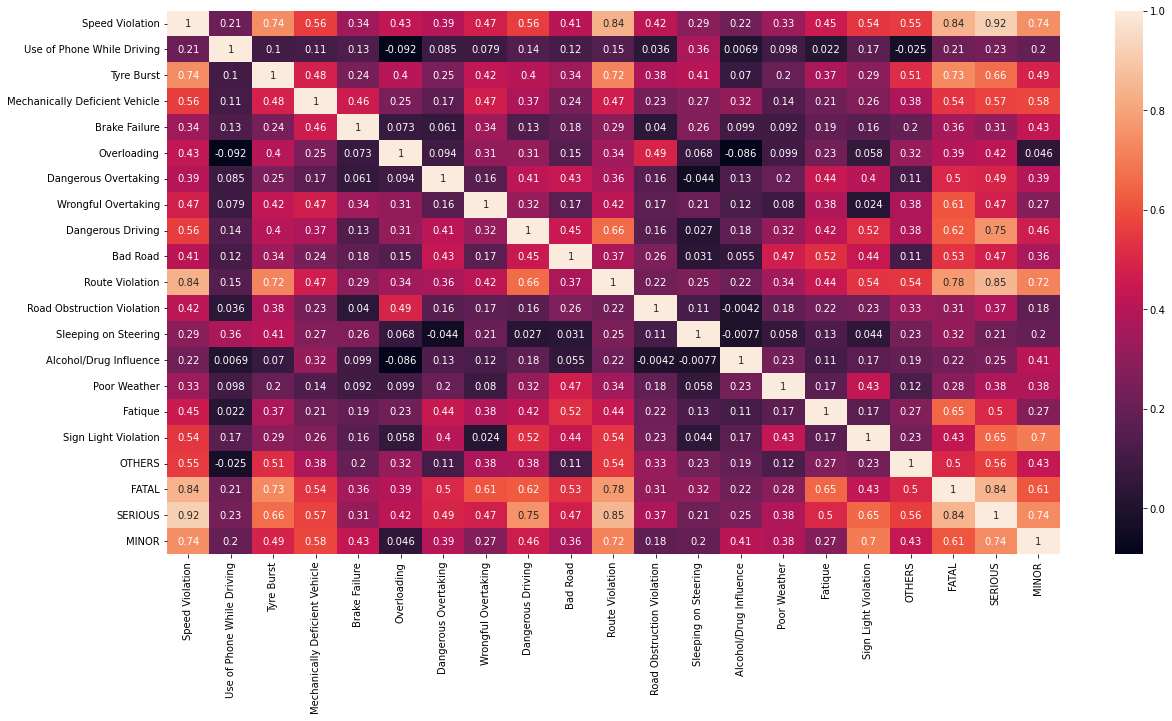

In [34]:
# lets plot a heatmap to check the correlation between the columns 
corr = df[['Speed Violation', 'Use of Phone While Driving',
       'Tyre Burst', 'Mechanically Deficient Vehicle', 'Brake Failure',
       'Overloading', 'Dangerous Overtaking', 'Wrongful Overtaking',
       'Dangerous Driving', 'Bad Road', 'Route Violation',
       'Road Obstruction Violation', 'Sleeping on Steering',
       'Alcohol/Drug Influence', 'Poor Weather', 'Fatique',
       'Sign Light Violation','OTHERS','FATAL', 'SERIOUS', 'MINOR']].corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
plt.show()

**NOTE** :According to the heatmap `Speed Violation` with `0.93` correlation and `Route Violation` with `0.85` correlation shows that they are strongly correlated with severity of accidents (serious). Some other variables are moderately correlated with the Severity of accidents such as `Tyre Burst`, `Dangerious driving` , `Route Violation` and `Spin Light Violaion` seems to be strongly correlated with the severity of Accidents (Fatal, Serious and Minor)


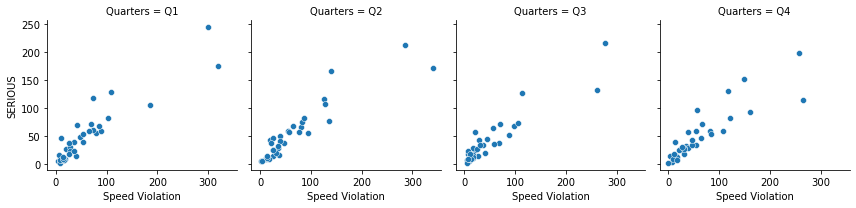

In [19]:
# Speed violation by Serious accident 


g = sns.FacetGrid(df, col='Quarters')
g.map(sns.scatterplot, 'Speed Violation','SERIOUS')

plt.show()

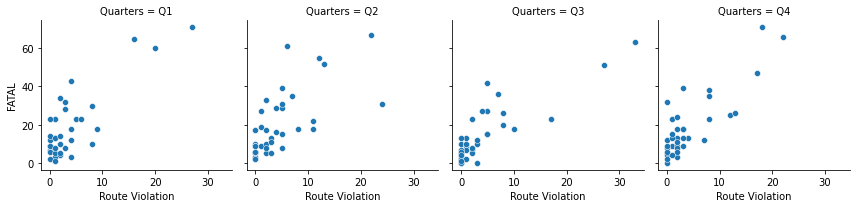

In [20]:
g = sns.FacetGrid(df, col='Quarters')
g.map(sns.scatterplot, 'Route Violation','FATAL')

plt.show()

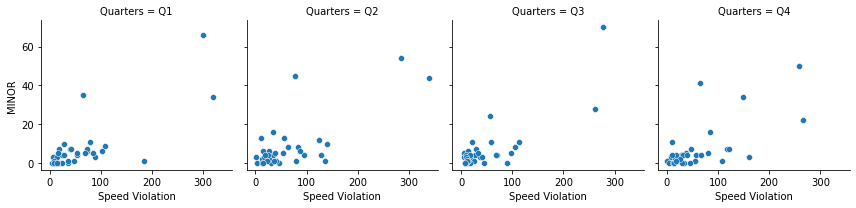

In [21]:
g = sns.FacetGrid(df, col='Quarters')
g.map(sns.scatterplot, 'Speed Violation','MINOR')

plt.show()

In [22]:
df.columns 

Index(['STATE', 'Quarters', 'Speed Violation', 'Use of Phone While Driving',
       'Tyre Burst', 'Mechanically Deficient Vehicle', 'Brake Failure',
       'Overloading', 'Dangerous Overtaking', 'Wrongful Overtaking',
       'Dangerous Driving', 'Bad Road', 'Route Violation',
       'Road Obstruction Violation', 'Sleeping on Steering',
       'Alcohol/Drug Influence', 'Poor Weather', 'Fatique',
       'Sign Light Violation', 'OTHERS', 'FATAL', 'SERIOUS', 'MINOR',
       'TOTAL CASES', 'NUMBER INJURED', 'NUMBER KILLED', 'TOTAL CASUALTY',
       'PEOPLE INVOLVED'],
      dtype='object')

### Regression Model 

**1. Using a linear regression model to explain the occurrence of fatal accidents**

In [23]:
# define dependent and independent variables 
x1 = df[['Speed Violation', 'Use of Phone While Driving',
       'Tyre Burst', 'Mechanically Deficient Vehicle', 'Brake Failure',
       'Overloading', 'Dangerous Overtaking', 'Wrongful Overtaking',
       'Dangerous Driving', 'Bad Road', 'Route Violation',
       'Road Obstruction Violation', 'Sleeping on Steering',
       'Alcohol/Drug Influence', 'Poor Weather', 'Fatique',
       'Sign Light Violation', 'OTHERS']]
y = df['FATAL']

In [29]:
x = sm.add_constant(x1)
model = sm.OLS(y,x)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  FATAL   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     58.93
Date:                Wed, 01 May 2024   Prob (F-statistic):           2.99e-53
Time:                        23:19:19   Log-Likelihood:                -458.66
No. Observations:                 148   AIC:                             955.3
Df Residuals:                     129   BIC:                             1012.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.5511      0.800      3.188      0.002       0.968       4.134
Speed Violation                    0.0814      0.017      4.753      0.000       0.048       0.115
Use of Phone While Driving         1.8893      1.195      1.581      0.116      -0.475       4.254
Tyre Burst                         0.4903      0.138      3.564      0.001       0.218       0.763
Mechanically Deficient Vehicle    -0.0780      0.190     -0.410      0.682      -0.454       0.298
Brake Failure                      0.0875      0.112      0.780      0.437      -0.134       0.309
Overloading                        0.5955      0.472      1.262      0.209      -0.338       1.529
Dangerous Overtaking               1.8140      0.601      3.019      0.003       0.625       3.003
Wrongful Overtaking                0.6254      0.118      5.285      0.000       0.391       0.860
Dangerous Driving                  0.2209      0.114      1.943      0.054      -0.004       0.446
Bad Road                           2.0285      0.718      2.827      0.005       0.609       3.448
Route Violation                    0.0438      0.182      0.241      0.810      -0.316       0.403
Road Obstruction Violation        -0.5279      0.300     -1.757      0.081      -1.122       0.067
Sleeping on Steering               1.0133      0.650      1.558      0.122      -0.274       2.300
Alcohol/Drug Influence             1.8900      0.994      1.901      0.059      -0.077       3.857
Poor Weather                      -1.6996      1.192     -1.426      0.156      -4.057       0.658
Fatique                            2.0178      0.449      4.496      0.000       1.130       2.906
Sign Light Violation               0.0136      0.033      0.417      0.678      -0.051       0.078
OTHERS                             0.0376      0.122      0.309      0.758      -0.203       0.278
==============================================================================
Omnibus:                       15.987   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.537
Skew:                           0.587   Prob(JB):                     7.74e-06
Kurtosis:                       4.561   Cond. No.                         246.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### interpretation of the summary:

1. **Overall Model Fit:**
   - The regression model shows a strong fit to the data, as indicated by the high R-squared value of 0.892. This suggests that around 89.2% of the variability in fatal accidents can be explained by the independent variables included in the model.

2. **Significant Predictors:**
   - Several factors appear to have statistically significant effects on fatal accidents.
   - Notable contributors include:
     - **Speed Violation:** Each unit increase in speed violations is associated with an estimated increase of 0.0814 fatal accidents, holding other variables constant.
     - **Wrongful Overtaking:** Wrongful overtaking is associated with an increase of 0.6254 fatal accidents.
     - **Fatigue:** Fatigue has a particularly strong impact, with each unit increase associated with an estimated increase of 2.0178 fatal accidents.
     - **Tyre Burst:** Tyre bursts also have a significant positive association with fatal accidents, with each occurrence associated with an estimated increase of 0.4903 fatal accidents.

3. **Non-Significant Predictors:**
   - Some factors do not show statistically significant associations with fatal accidents at the chosen significance level (typically p < 0.05).
   - For example, 'Use of Phone While Driving', 'Brake Failure', 'Overloading', 'Route Violation', 'Poor Weather', 'Sign Light Violation', and 'OTHERS' do not appear to have statistically significant effects on fatal accidents based on the p-values.

4. **Policy Implications:**
   - The results highlight specific areas where interventions may be most effective in reducing fatal accidents.
   - For instance, strategies aimed at reducing speeding, curbing wrongful overtaking behaviors, and addressing driver fatigue could potentially yield significant improvements in road safety.
   - Additionally, addressing factors such as tyre bursts and road conditions may also contribute to reducing the occurrence of fatal accidents.

**2. Using a linear regression model to explain the occurrence of serious accidents**

In [30]:
# define dependent and independent variables 
x2 = df[['Speed Violation', 'Use of Phone While Driving',
       'Tyre Burst', 'Mechanically Deficient Vehicle', 'Brake Failure',
       'Overloading', 'Dangerous Overtaking', 'Wrongful Overtaking',
       'Dangerous Driving', 'Bad Road', 'Route Violation',
       'Road Obstruction Violation', 'Sleeping on Steering',
       'Alcohol/Drug Influence', 'Poor Weather', 'Fatique',
       'Sign Light Violation', 'OTHERS']]
y2 = df['SERIOUS']

In [31]:
x3 = sm.add_constant(x2)
model = sm.OLS(y2,x3)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                SERIOUS   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     143.2
Date:                Wed, 01 May 2024   Prob (F-statistic):           4.84e-76
Time:                        23:54:28   Log-Likelihood:                -553.98
No. Observations:                 148   AIC:                             1146.
Df Residuals:                     129   BIC:                             1203.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              5.7640      1.524      3.782      0.000       2.749       8.779
Speed Violation                    0.3432      0.033     10.526      0.000       0.279       0.408
Use of Phone While Driving         6.6082      2.276      2.903      0.004       2.105      11.111
Tyre Burst                        -0.1225      0.262     -0.468      0.641      -0.641       0.396
Mechanically Deficient Vehicle     1.0097      0.362      2.789      0.006       0.293       1.726
Brake Failure                     -0.0355      0.214     -0.166      0.868      -0.458       0.387
Overloading                        1.8973      0.899      2.111      0.037       0.119       3.675
Dangerous Overtaking               2.9246      1.144      2.556      0.012       0.661       5.188
Wrongful Overtaking                0.3757      0.225      1.667      0.098      -0.070       0.822
Dangerous Driving                  1.5871      0.216      7.331      0.000       1.159       2.015
Bad Road                          -1.4966      1.366     -1.095      0.275      -4.200       1.207
Route Violation                    0.4538      0.346      1.311      0.192      -0.231       1.139
Road Obstruction Violation        -0.0364      0.572     -0.064      0.949      -1.168       1.096
Sleeping on Steering              -1.2571      1.239     -1.015      0.312      -3.708       1.193
Alcohol/Drug Influence             0.1554      1.893      0.082      0.935      -3.590       3.900
Poor Weather                       1.3464      2.269      0.593      0.554      -3.143       5.836
Fatique                            2.1339      0.855      2.497      0.014       0.443       3.825
Sign Light Violation               0.3564      0.062      5.717      0.000       0.233       0.480
OTHERS                             0.5379      0.232      2.322      0.022       0.080       0.996
==============================================================================
Omnibus:                        6.484   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.223
Skew:                           0.410   Prob(JB):                       0.0445
Kurtosis:                       3.582   Cond. No.                         246.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  Interpretation
1. **Overall Model Fit:**
   - The regression model shows a very strong fit to the data, with an R-squared value of 0.952. This indicates that approximately 95.2% of the variability in serious accidents (SERIOUS) can be explained by the independent variables included in the model.

2. **Significant Predictors:**
   - Several factors demonstrate statistically significant effects on serious accidents:
     - **Speed Violation:** Each unit increase in speed violations is associated with an estimated increase of 0.3432 serious accidents, holding other variables constant.
     - **Use of Phone While Driving:** The use of phones while driving shows a significant positive association with serious accidents, with each instance associated with an increase of 6.6082 serious accidents.
     - **Dangerous Driving:** This factor also exhibits a significant positive association, with each occurrence associated with an increase of 1.5871 serious accidents.
     - **Fatigue:** Fatigue has a statistically significant positive association, with each unit increase associated with an estimated increase of 2.1339 serious accidents.
     - **Sign Light Violation:** Violations related to signal lights show a significant positive association, with each violation associated with an increase of 0.3564 serious accidents.

3. **Non-Significant Predictors:**
   - Some factors do not show statistically significant associations with serious accidents at the chosen significance level (p < 0.05). These include 'Tyre Burst', 'Brake Failure', 'Bad Road', 'Route Violation', 'Road Obstruction Violation', 'Sleeping on Steering', 'Alcohol/Drug Influence', 'Poor Weather', and 'OTHERS'.

4. **Policy Implications:**
   - The results underscore the importance of addressing factors such as speeding, phone usage while driving, dangerous driving behaviors, fatigue, and violations related to signal lights to reduce the incidence of serious accidents.
   - Interventions targeting these factors could potentially lead to substantial improvements in road safety and a reduction in the severity of accidents.
   - While certain factors such as 'Use of Phone While Driving' and 'Dangerous Driving' show particularly strong associations, it's essential to consider a comprehensive approach that addresses multiple contributing factors simultaneously.

5. **Limitations:**
   - As with any statistical analysis, there may be limitations and assumptions associated with the regression model.
   - While the model provides insights into statistical associations, it does not establish causation. Further research and analyses may be necessary to explore causal relationships and validate the findings.

**3. Using a linear regression model to explain the occurrence of Minor accidents**

In [32]:
# define dependent and independent variables 
x4 = df[['Speed Violation', 'Use of Phone While Driving',
       'Tyre Burst', 'Mechanically Deficient Vehicle', 'Brake Failure',
       'Overloading', 'Dangerous Overtaking', 'Wrongful Overtaking',
       'Dangerous Driving', 'Bad Road', 'Route Violation',
       'Road Obstruction Violation', 'Sleeping on Steering',
       'Alcohol/Drug Influence', 'Poor Weather', 'Fatique',
       'Sign Light Violation', 'OTHERS']]

y3 = df['MINOR']

In [33]:
X = sm.add_constant(x4)
model = sm.OLS(y3,X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  MINOR   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     37.93
Date:                Thu, 02 May 2024   Prob (F-statistic):           9.68e-43
Time:                        00:03:31   Log-Likelihood:                -443.55
No. Observations:                 148   AIC:                             925.1
Df Residuals:                     129   BIC:                             982.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.1256      0.723     -0.174      0.862      -1.555       1.304
Speed Violation                    0.0593      0.015      3.835      0.000       0.029       0.090
Use of Phone While Driving         0.3135      1.079      0.291      0.772      -1.822       2.449
Tyre Burst                        -0.1340      0.124     -1.078      0.283      -0.380       0.112
Mechanically Deficient Vehicle     0.7105      0.172      4.139      0.000       0.371       1.050
Brake Failure                      0.3251      0.101      3.210      0.002       0.125       0.525
Overloading                       -1.5358      0.426     -3.604      0.000      -2.379      -0.693
Dangerous Overtaking               0.9451      0.543      1.742      0.084      -0.128       2.019
Wrongful Overtaking               -0.1151      0.107     -1.077      0.283      -0.327       0.096
Dangerous Driving                 -0.2916      0.103     -2.840      0.005      -0.495      -0.088
Bad Road                          -0.1367      0.648     -0.211      0.833      -1.419       1.145
Route Violation                    0.5551      0.164      3.381      0.001       0.230       0.880
Road Obstruction Violation        -0.2344      0.271     -0.864      0.389      -0.771       0.302
Sleeping on Steering              -0.4253      0.587     -0.724      0.470      -1.587       0.737
Alcohol/Drug Influence             2.9606      0.898      3.298      0.001       1.185       4.736
Poor Weather                       1.0321      1.076      0.959      0.339      -1.097       3.161
Fatique                           -0.2850      0.405     -0.703      0.483      -1.087       0.517
Sign Light Violation               0.1853      0.030      6.268      0.000       0.127       0.244
OTHERS                             0.1855      0.110      1.688      0.094      -0.032       0.403
==============================================================================
Omnibus:                       89.293   Durbin-Watson:                   2.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.612
Skew:                           2.019   Prob(JB):                    7.31e-153
Kurtosis:                      12.864   Cond. No.                         246.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's break down the interpretation of the results from the regression analysis:

1. **Overall Model Fit:**
   - The regression model exhibits a strong fit to the data, with an R-squared value of 0.841. This indicates that approximately 84.1% of the variability in minor accidents (MINOR) can be explained by the independent variables included in the model.

2. **Significant Predictors:**
   - Several factors demonstrate statistically significant effects on minor accidents:
     - **Speed Violation:** Each unit increase in speed violations is associated with an estimated increase of 0.0593 minor accidents, holding other variables constant.
     - **Mechanically Deficient Vehicle:** This factor shows a significant positive association, with each instance associated with an increase of 0.7105 minor accidents.
     - **Brake Failure:** Similarly, brake failure is associated with an increase of 0.3251 minor accidents.
     - **Overloading:** Overloading exhibits a significant negative association, with each occurrence associated with a decrease of 1.5358 minor accidents.
     - **Route Violation:** Violations related to route regulations are positively associated with minor accidents, with each violation associated with an increase of 0.5551 minor accidents.
     - **Alcohol/Drug Influence:** Instances of alcohol or drug influence show a significant positive association, with each instance associated with an increase of 2.9606 minor accidents.
     - **Sign Light Violation:** Violations related to signal lights are positively associated with minor accidents, with each violation associated with an increase of 0.1853 minor accidents.

3. **Non-Significant Predictors:**
   - Some factors do not show statistically significant associations with minor accidents at the chosen significance level (p < 0.05). These include `Use of Phone While Driving`,  `Tyre Burst`,  `Dangerous Overtaking`,  `Wrongful Overtaking`,  `Bad Road`,  `Road Obstruction Violation`,  `Sleeping on Steering`,  `Poor Weather`,  `Fatigue`, and  `OTHERS`.

4. **Policy Implications:**
   - The findings suggest specific areas where interventions may be effective in reducing minor accidents.
   - Strategies aimed at addressing factors such as speeding, mechanically deficient vehicles, brake failures, route violations, alcohol/drug influence, and violations related to signal lights may help mitigate the incidence of minor accidents.
   - Additionally, measures to enforce regulations and enhance road safety awareness may contribute to reducing the frequency of minor accidents.
